In [1]:
import spotipy
import json
import pandas as pd
import unicodedata
from pprint import pprint

In [2]:
sp = spotipy.Spotify()

In [3]:
def remove_accents(string):
    return ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))

In [4]:
def search_artist(band_name):
    """
    Calls the Spotify API object and returns only one artist object
    """
    
    try:
        # remove accents and make lowercase
        band_name = remove_accents(band_name).lower()
        
        # call api
        results = sp.search(q=band_name, limit=20, type='artist')
        print("{} => {} artists found".format(band_name, len(results)))
        
        # some manual changes
        if band_name == 'chk chk chk':
            band_name = '!!!'

        # return only one artist
        if results['artists']['total'] > 0:
            return [artist for artist in results['artists']['items'] if remove_accents(artist['name']).lower() == band_name][0]
        else:
            return []

    except:
        print('Error')
        return []

In [5]:
# Read the festival bands and construct a list of band_names
json_data=open('bands.json').read()
bands = json.loads(json_data)
band_names = [b['name'] for b in bands]

# manually remove some bands
band_names = [b for b in band_names]

# band_names = ['jardin de la croix']
# band_names = band_names[0:10]

In [6]:
# Get all artists from Spotify API
# all_artists = []
# for band_name in band_names:
#     artist = search_artist(band_name)
#     if len(artist) > 0:
#         all_artists.append(artist)

# persist artists downloaded
with open('spotipy_artists.json', 'w') as fp:
    json.dump(all_artists, fp)

!!! => 1 artists found
chk chk chk => 1 artists found
7 notas 7 colores => 1 artists found
abdulla rashim => 1 artists found
about leaving => 1 artists found
the afghan whigs => 1 artists found
against me! => 1 artists found
agorazein => 1 artists found
aldrin y collins => 1 artists found
alex cameron => 1 artists found
alexandra savior => 1 artists found
alexis taylor => 1 artists found
alien tango => 1 artists found
all indians no chief => 1 artists found
ame live => 1 artists found
angel olsen => 1 artists found
angela => 1 artists found
animic => 1 artists found
annette peacock => 1 artists found
aphex twin => 1 artists found
arcade fire => 1 artists found
aries => 1 artists found
aurora halal => 1 artists found
autarkic live => 1 artists found
avalon emerson => 1 artists found
badbadnotgood => 1 artists found
barbott => 1 artists found
belako => 1 artists found
belushi => 1 artists found
ben ufo => 1 artists found
berri txarrak => 1 artists found
bicep => 1 artists found
the black

In [7]:
# Extract all genres
all_genres = []
for a in all_artists:
    all_genres.extend(a['genres'])

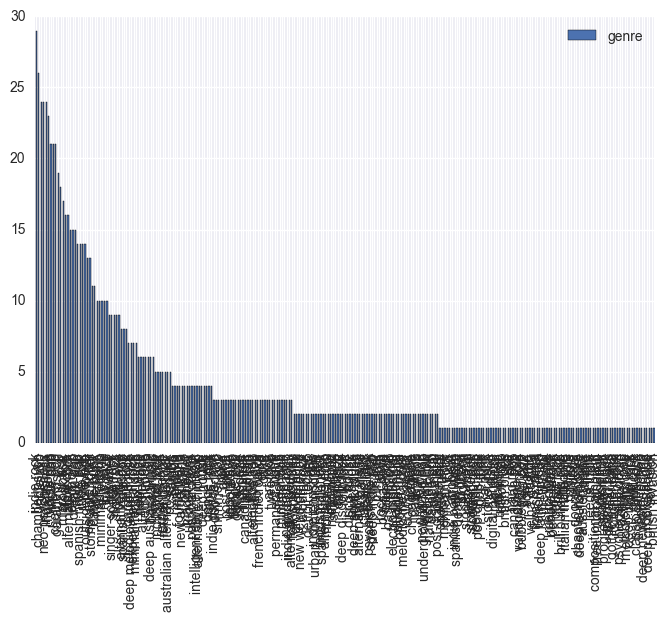

In [16]:
# plot a histogram with all genres
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

genres = pd.DataFrame(all_genres, columns=['genre'])
genres.apply(pd.value_counts).plot(kind='bar')

In [15]:
# explore the most common words used in the genres
all_genres_string = ' '.join(all_genres)

from collections import Counter
words = all_genres_string.split()
wordCount = Counter(words)
wordCount.most_common

<bound method Counter.most_common of Counter({'rock': 147, 'pop': 143, 'indie': 141, 'house': 71, 'chamber': 47, 'psych': 45, 'noise': 44, 'alternative': 42, 'garage': 38, 'folk': 38, 'new': 30, 'spanish': 29, 'deep': 28, 'r&b': 28, 'indietronica': 27, 'punk': 24, 'neo-psychedelic': 24, 'float': 23, 'metal': 23, 'minimal': 22, 'dance': 19, 'wave': 19, 'hop': 18, 'lo-fi': 18, 'hip': 17, 'microhouse': 17, 'techno': 17, 'freak': 16, 'slow': 16, 'core': 16, 'electronic': 15, 'dream': 15, 'nu': 14, 'folk-pop': 14, 'preverb': 14, 'room': 13, 'escape': 13, 'outsider': 13, 'tech': 13, 'and': 12, 'experimental': 12, 'dance-punk': 11, 'holler': 11, 'music': 11, 'stomp': 11, 'australian': 11, 'rave': 10, 'gaze': 10, 'synthpop': 10, 'industrial': 10, 'melodic': 10, 'fluxwork': 9, 'soul': 9, 'singer-songwriter': 9, 'post-punk': 9, 'rap': 9, 'chillwave': 9, 'space': 9, 'euro': 8, 'anti-folk': 8, 'trap': 7, 'disco': 7, 'bass': 7, 'dub': 6, 'americana': 6, 'alt-indie': 6, 'latino': 6, 'uk': 6, 'neo': 

#### TF-IDF to assign each band to one of the words

Definitions:
- TF : occurrences of word w in band genres / num of words in band genres
- IDF: log( total number of bands / number of bands with word w in it)

Hence:
- Each bands will have a string with words of band genres
- Each word of the string has a TFIDF score
- Each band has a word with a top TFIDF